<a href="https://colab.research.google.com/github/Ad1ty4shrma/Projects/blob/main/xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import os

TensorFlow version: 2.18.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install opencv-python

In [5]:
!pip install albumentations==1.4.0 --force-reinstall --no-cache-dir # Example: 1.4.0, check PyPI for latest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 203.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 178.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 235.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 228.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 205.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 284.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 204.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 139.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 212.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import albumentations
print(albumentations.__version__)

1.4.0


In [2]:
# 1. Ensure Drive is mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # force_remount can sometimes help with stale views

# 2. Define the expected directory and filename
expected_util_directory = '/content/drive/MyDrive/xraydataset'
expected_util_filename = 'util.py'
full_expected_path = os.path.join(expected_util_directory, expected_util_filename)

# 3. Check if the directory exists
print(f"Checking if directory '{expected_util_directory}' exists...")
if os.path.exists(expected_util_directory) and os.path.isdir(expected_util_directory):
    print(f"Directory '{expected_util_directory}' exists and is a directory.")

    # 4. List contents of the directory to see if util.py is there
    print(f"\n--- Contents of '{expected_util_directory}' (looking for '{expected_util_filename}') ---")
    try:
        contents = os.listdir(expected_util_directory)
        if not contents:
            print(f"The directory '{expected_util_directory}' is EMPTY.")
        elif expected_util_filename in contents:
            print(f"SUCCESS: Found '{expected_util_filename}' in '{expected_util_directory}'!")
        else:
            print(f"ERROR: Did NOT find '{expected_util_filename}' directly in '{expected_util_directory}'.")
            print("Files found in the directory are:")
            for item in contents[:20]: # Print first 20 items
                print(f"- {item}")
            if len(contents) > 20:
                print(f"- ... and {len(contents) - 20} more items.")
    except Exception as e:
        print(f"Error listing contents of '{expected_util_directory}': {e}")
else:
    print(f"ERROR: Directory '{expected_util_directory}' does NOT exist or is not a directory.")
    print("Please verify the path and ensure your Google Drive is correctly mounted.")

# 5. Also check with a shell command (sometimes gives different feedback)
print("\n--- Shell command check ---")
!ls -l /content/drive/MyDrive/xraydataset/util.py

Mounted at /content/drive


NameError: name 'os' is not defined

In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import importlib
import sys

# --- Corrected util.py import ---
# Path to the DIRECTORY CONTAINING util.py
path_to_util_directory = '/content/drive/MyDrive/xraydataset' # <--- REMOVE /util.py from here

# Add the DIRECTORY to sys.path
sys.path.append(path_to_util_directory)

try:
    import util  # Import by module name, WITHOUT .py
    importlib.reload(util) # Reload to pick up any changes
    print(f"Successfully imported and reloaded util from the directory: {path_to_util_directory}")
except ModuleNotFoundError:
    print(f"ERROR: Could not find 'util' module in '{path_to_util_directory}' or other sys.path locations.")
    print("Please ensure 'util.py' exists in that directory and the path is correct.")
    # Define a placeholder if util is critical and not found, to allow other parts to run
    class util_placeholder:
        def get_roc_curve(self, lbls, pred_vals, gen): print("util.get_roc_curve (placeholder) not available"); return [0.5]*len(lbls) if lbls else []
        def compute_gradcam(self, model, img, img_dir, df, lbls, lbls_show): print("util.compute_gradcam (placeholder) not available")
    util = util_placeholder()
except Exception as e:
    print(f"An unexpected error occurred during util import/reload: {e}")
    class util_placeholder: # Fallback
        def get_roc_curve(self, lbls, pred_vals, gen): print("util.get_roc_curve (placeholder) not available"); return [0.5]*len(lbls) if lbls else []
        def compute_gradcam(self, model, img, img_dir, df, lbls, lbls_show): print("util.compute_gradcam (placeholder) not available")
    util = util_placeholder()


# --- Rest of your imports ---
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import tensorflow as tf # Good to have this explicitly for tf.version
print("TensorFlow version:", tf.__version__)



Successfully imported and reloaded util from the directory: /content/drive/MyDrive/xraydataset
TensorFlow version: 2.18.0


In [3]:
EXCEL_FILE_PATH = "/content/drive/MyDrive/xraydataset/DataEntry.xlsx"
# Path to the directory on Google Drive containing your actual image files
IMAGE_DIR_PATH = "/content/drive/MyDrive/xraydataset/images_preprocessed_clahe_cropped/"

In [4]:
labels = ['Cardiomegaly', 'Bronchitis', 'Effusion', 'Pneumonia', 'Atelectasis','Normal']
NUM_CLASSES = len(labels)

In [5]:
FILENAME_COLUMN_IN_EXCEL = 'Image'  # Column in Excel holding the base identifier (e.g., 1, 2, 23)
FINDINGS_COLUMN_IN_EXCEL = 'Labels' # Column in Excel with pipe-separated findings
CONSTRUCTED_FILENAME_PREFIX = "image" # e.g., "image" to make "image1.png"
CONSTRUCTED_FILENAME_SUFFIX = ".png"  # e.g., ".png

In [8]:
print(f"\nAttempting to load Excel file: {EXCEL_FILE_PATH}")
try:
    full_df = pd.read_excel(EXCEL_FILE_PATH)
    print("Successfully loaded Excel file.")
    print(f"Original Excel columns: {list(full_df.columns)}")
    print(f"First 5 rows of original data:\n{full_df.head()}")
except FileNotFoundError:
    print(f"ERROR: Excel file '{EXCEL_FILE_PATH}' not found!")
    raise SystemExit(f"Excel file {EXCEL_FILE_PATH} not found.")
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")
    raise SystemExit("Excel loading failed.")


Attempting to load Excel file: /content/drive/MyDrive/xraydataset/DataEntry.xlsx
Successfully loaded Excel file.
Original Excel columns: ['Image', 'Age', 'Gender', 'Labels']
First 5 rows of original data:
   Image  Age Gender                  Labels
0      1   19      M                  Normal
1      2   56      F               Pneumonia
2      3   44      M                  Normal
3      4   69      M  Pneumonia|Cardiomegaly
4      5   54      F               Pneumonia


COUNT PLOT

Loading data from: /content/drive/MyDrive/xraydataset/DataEntry.xlsx
Successfully loaded. Found 441 entries.

One-hot encoding findings for class distribution analysis based on 'Labels' column...

Class Counts:
  Cardiomegaly: 51
  Bronchitis: 83
  Effusion: 23
  Pneumonia: 115
  Atelectasis: 7
  Normal: 239


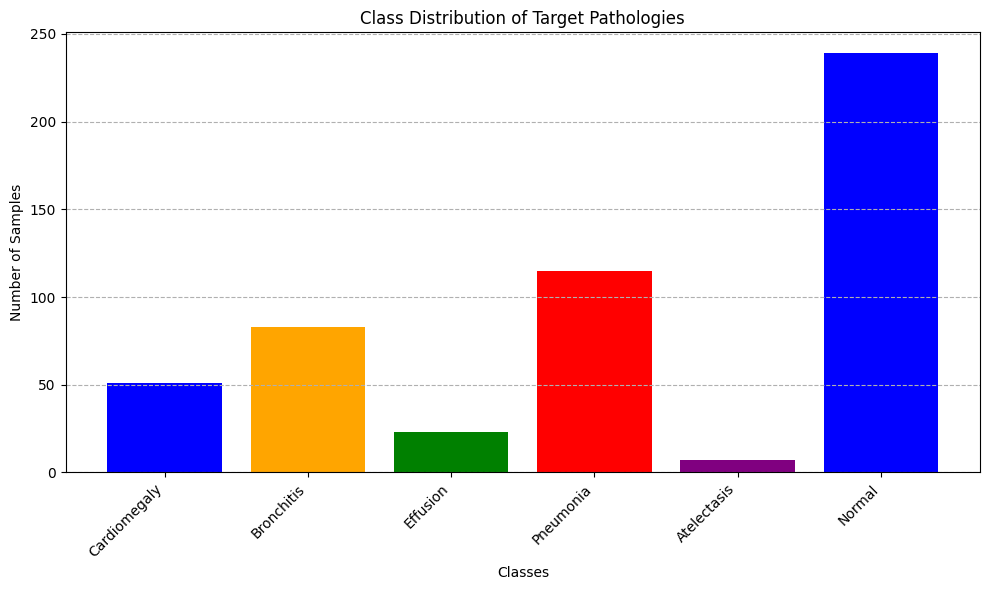

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # For sum if needed, though pandas sum works

# --- Configuration (Ensure these are defined from your script) ---
EXCEL_FILE_PATH = "/content/drive/MyDrive/xraydataset/DataEntry.xlsx"
FINDINGS_COLUMN_IN_EXCEL = 'Labels' # The column in your Excel with pipe-separated findings
# Your 5 target classes
CLASS_NAMES = ['Cardiomegaly', 'Bronchitis', 'Effusion', 'Pneumonia', 'Atelectasis', 'Normal']

# --- Load your Excel data ---
print(f"Loading data from: {EXCEL_FILE_PATH}")
try:
    # Assuming 'full_df' is not needed elsewhere, or you can load it into a new variable
    df_for_distribution = pd.read_excel(EXCEL_FILE_PATH)
    print(f"Successfully loaded. Found {len(df_for_distribution)} entries.")
except FileNotFoundError:
    print(f"ERROR: Excel file '{EXCEL_FILE_PATH}' not found!")
    raise SystemExit(f"Excel file {EXCEL_FILE_PATH} not found.")
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")
    raise SystemExit("Excel loading failed.")

# --- Check if the findings column exists ---
if FINDINGS_COLUMN_IN_EXCEL not in df_for_distribution.columns:
    print(f"ERROR: Findings column '{FINDINGS_COLUMN_IN_EXCEL}' not found in the Excel sheet!")
    print(f"Available columns are: {list(df_for_distribution.columns)}")
    raise SystemExit(f"Column '{FINDINGS_COLUMN_IN_EXCEL}' not found.")

# --- One-Hot Encode the target labels directly in the loaded DataFrame ---
# This will create columns for each of your CLASS_NAMES
print(f"\nOne-hot encoding findings for class distribution analysis based on '{FINDINGS_COLUMN_IN_EXCEL}' column...")
for label_name in CLASS_NAMES:
    # Ensure the findings column is treated as string, handle NaNs by converting to empty string
    # Split by pipe '|' to correctly identify multiple labels in one string
    df_for_distribution[label_name] = df_for_distribution[FINDINGS_COLUMN_IN_EXCEL].fillna('').astype(str).apply(
        lambda finding_string: 1 if label_name in finding_string.split('|') else 0
    )

if not all(col in df_for_distribution.columns for col in CLASS_NAMES):
    print("Error: Not all CLASS_NAMES were successfully created as columns during one-hot encoding.")
    # Find which ones are missing
    missing_cols = [col for col in CLASS_NAMES if col not in df_for_distribution.columns]
    print(f"Missing columns: {missing_cols}")
    class_counts = [0] * len(CLASS_NAMES) # Fallback
else:
    class_counts = df_for_distribution[CLASS_NAMES].sum(axis=0).values # Get counts as a NumPy array
    # The .values ensures class_counts is an array, not a Pandas Series, for plt.bar if needed.
    # df_for_distribution[CLASS_NAMES].sum() would also work directly with plt.bar if CLASS_NAMES are x-ticks

# --- Plot Class Distribution ---
print("\nClass Counts:")
for name, count in zip(CLASS_NAMES, class_counts):
    print(f"  {name}: {count}")

plt.figure(figsize=(10, 6))
plt.bar(CLASS_NAMES, class_counts, color=['blue', 'orange', 'green', 'red', 'purple']) # Added colors
plt.title("Class Distribution of Target Pathologies")
plt.ylabel("Number of Samples")
plt.xlabel("Classes")
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

PREPROCESSING AND RECONSTRUCTING FILE NAMES


In [10]:
print(f"\nPreprocessing filename column '{FILENAME_COLUMN_IN_EXCEL}'...")
if FILENAME_COLUMN_IN_EXCEL not in full_df.columns:
    print(f"ERROR: Filename column '{FILENAME_COLUMN_IN_EXCEL}' not found in Excel. Available columns: {list(full_df.columns)}")
    raise SystemExit(f"Filename column '{FILENAME_COLUMN_IN_EXCEL}' missing.")

full_df.dropna(subset=[FILENAME_COLUMN_IN_EXCEL], inplace=True) # Drop rows if filename ID is missing
full_df[FILENAME_COLUMN_IN_EXCEL] = full_df[FILENAME_COLUMN_IN_EXCEL].astype(str) # Ensure string
print(f"Number of rows after ensuring filename ID is string and dropping NaNs: {len(full_df)}")

def construct_filename_from_excel(value_from_excel_col):
    s = str(value_from_excel_col).strip()
    if not s: return "" # Handle empty original values

    # Logic: If original value is "1", "23", etc. -> "image1.png", "image23.png"
    # This function assumes 'value_from_excel_col' is JUST the number part.
    # It does NOT try to strip existing prefixes/suffixes from the excel column itself,
    # as the excel seems to just have numbers.
    return f"{CONSTRUCTED_FILENAME_PREFIX}{s}{CONSTRUCTED_FILENAME_SUFFIX}"

full_df[FILENAME_COLUMN_IN_EXCEL] = full_df[FILENAME_COLUMN_IN_EXCEL].apply(construct_filename_from_excel)
full_df = full_df[full_df[FILENAME_COLUMN_IN_EXCEL] != ""] # Remove rows if construction led to empty filename
print(f"Number of rows after filename construction: {len(full_df)}")
print(f"Example filenames after construction:\n{full_df[FILENAME_COLUMN_IN_EXCEL].head()}")



Preprocessing filename column 'Image'...
Number of rows after ensuring filename ID is string and dropping NaNs: 441
Number of rows after filename construction: 441
Example filenames after construction:
0    image1.png
1    image2.png
2    image3.png
3    image4.png
4    image5.png
Name: Image, dtype: object


ONE HOT ENCODING


In [11]:
print(f"\nOne-hot encoding findings column '{FINDINGS_COLUMN_IN_EXCEL}' for the {NUM_CLASSES} target labels...")
if FINDINGS_COLUMN_IN_EXCEL not in full_df.columns:
    print(f"ERROR: Findings column '{FINDINGS_COLUMN_IN_EXCEL}' not found. Available columns: {list(full_df.columns)}")
    raise SystemExit(f"Findings column '{FINDINGS_COLUMN_IN_EXCEL}' missing.")

for label_name in labels:
    full_df[label_name] = full_df[FINDINGS_COLUMN_IN_EXCEL].fillna('').astype(str).apply(
        lambda finding_string: 1 if label_name in finding_string.split('|') else 0 # Split by pipe for multi-label
    )
print(f"Example one-hot encoded labels:\n{full_df[labels].head()}")


One-hot encoding findings column 'Labels' for the 6 target labels...
Example one-hot encoded labels:
   Cardiomegaly  Bronchitis  Effusion  Pneumonia  Atelectasis  Normal
0             0           0         0          0            0       1
1             0           0         0          1            0       0
2             0           0         0          0            0       1
3             1           0         0          1            0       0
4             0           0         0          1            0       0


FINAL COLUMNS


In [12]:
columns_to_feed_generator = [FILENAME_COLUMN_IN_EXCEL] + labels
processed_df = full_df[columns_to_feed_generator].copy()
print(f"\nFinal processed DataFrame head for generators:\n{processed_df.head()}")
print(f"Shape of processed_df: {processed_df.shape}")

if processed_df.empty:
    print("ERROR: processed_df is empty after all preprocessing. Cannot proceed.")
    raise SystemExit("processed_df is empty.")



Final processed DataFrame head for generators:
        Image  Cardiomegaly  Bronchitis  Effusion  Pneumonia  Atelectasis  \
0  image1.png             0           0         0          0            0   
1  image2.png             0           0         0          1            0   
2  image3.png             0           0         0          0            0   
3  image4.png             1           0         0          1            0   
4  image5.png             0           0         0          1            0   

   Normal  
0       1  
1       0  
2       1  
3       0  
4       0  
Shape of processed_df: (441, 7)


TRAIN TEST SPLIT


In [13]:
print("\nSplitting data into train, validation, and test sets...")
# (Using the robust splitting logic from previous version)
train_df = pd.DataFrame(columns=processed_df.columns)
valid_df = pd.DataFrame(columns=processed_df.columns)
test_df = pd.DataFrame(columns=processed_df.columns)

if len(processed_df) < 10:
    print(f"Warning: Very small dataset ({len(processed_df)} samples). Adjusting splits.")
    train_df = processed_df.copy()
    if len(processed_df) > 2:
        train_df, temp_val_test = train_test_split(processed_df, test_size=min(0.4, 2/len(processed_df) if len(processed_df)>0 else 0.4), random_state=42)
        if len(temp_val_test) > 1:
            valid_df, test_df = train_test_split(temp_val_test, test_size=0.5, random_state=21)
        elif len(temp_val_test) == 1:
            valid_df = temp_val_test.copy()
    # test_df and valid_df might remain empty if len(processed_df) <= 2
else:
    stratify_col_values = processed_df[labels].sum(axis=1) > 0
    can_stratify = len(stratify_col_values.unique()) > 1
    train_df_temp, test_df = train_test_split(
        processed_df, test_size=0.20, random_state=42, stratify=stratify_col_values if can_stratify else None)
    if len(train_df_temp) > 1 :
        stratify_col_train_values = train_df_temp[labels].sum(axis=1) > 0
        can_stratify_train = len(stratify_col_train_values.unique()) > 1
        train_df, valid_df = train_test_split(
            train_df_temp, test_size=0.15, random_state=42, stratify=stratify_col_train_values if can_stratify_train else None)
    elif len(train_df_temp) == 1: train_df = train_df_temp.copy()

print(f"Final Train set size: {len(train_df)}")
print(f"Final Validation set size: {len(valid_df)}")
print(f"Final Test set size: {len(test_df)}")


Splitting data into train, validation, and test sets...
Final Train set size: 299
Final Validation set size: 53
Final Test set size: 89


SINGLE LABEL OVERSAMPLING



--- Applying Single-Label Focused Oversampling to train_df ---
Original train_df size: 299
Current positive counts in train_df:
  Cardiomegaly: 34
  Bronchitis: 61
  Effusion: 12
  Pneumonia: 74
  Atelectasis: 4
  Normal: 163
Current single-label positive counts in train_df:
  Single-label Cardiomegaly: 9
  Single-label Bronchitis: 36
  Single-label Effusion: 2
  Single-label Pneumonia: 44
  Single-label Atelectasis: 1
  Single-label Normal: 163
Target count for oversampling single-label instances: 163
Processing Cardiomegaly: current single-label positive samples = 9
  Oversampling single-label Cardiomegaly: need to add 154 samples.
Processing Bronchitis: current single-label positive samples = 36
  Oversampling single-label Bronchitis: need to add 127 samples.
Processing Effusion: current single-label positive samples = 2
  Oversampling single-label Effusion: need to add 161 samples.
Processing Pneumonia: current single-label positive samples = 44
  Oversampling single-label Pneumon

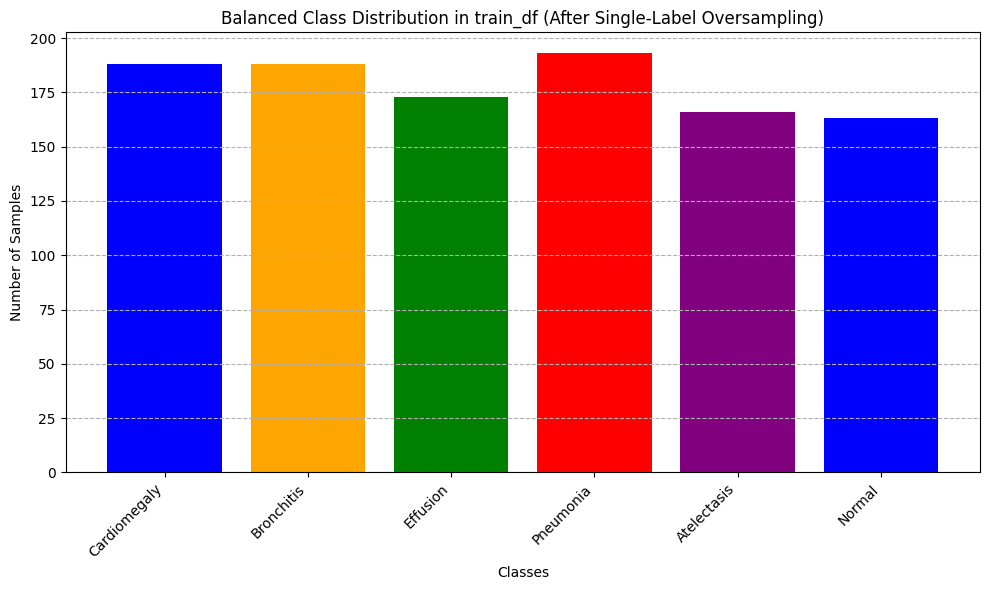

In [14]:
import pandas as pd
from sklearn.utils import resample # For easy resampling
import matplotlib.pyplot as plt
import numpy as np


print("\n--- Applying Single-Label Focused Oversampling to train_df ---")

if not train_df.empty:
    original_train_df_size = len(train_df)
    print(f"Original train_df size: {original_train_df_size}")

    # Calculate current positive counts for each target label
    current_positive_counts = {label: train_df[label].sum() for label in CLASS_NAMES if label in train_df.columns}
    print("Current positive counts in train_df:")
    for label, count in current_positive_counts.items():
        print(f"  {label}: {count}")

    # --- Determine the target count for oversampling ---
    # Option: Target the count of the most frequent class among your 5 target labels
    if not current_positive_counts or not any(current_positive_counts.values()):
        print("No positive samples for target labels in train_df. Skipping oversampling.")
        target_count = 0
    else:
        # We are interested in the count of single-label instances of the most frequent class
        # to set as a target for other single-label instances.
        single_label_counts = {}
        for cls_name in CLASS_NAMES:
            if cls_name in train_df.columns:
                # Condition for single label: current class is 1, all other target classes are 0
                is_single_label_condition = (train_df[cls_name] == 1)
                for other_cls in CLASS_NAMES:
                    if other_cls != cls_name and other_cls in train_df.columns:
                        is_single_label_condition &= (train_df[other_cls] == 0)
                single_label_counts[cls_name] = train_df[is_single_label_condition].shape[0]
            else:
                single_label_counts[cls_name] = 0

        print("Current single-label positive counts in train_df:")
        for label, count in single_label_counts.items():
            print(f"  Single-label {label}: {count}")

        if not any(single_label_counts.values()):
            print("No single-label positive samples found for any target class. Skipping oversampling.")
            target_count = 0
        else:
            target_count = max(c for c in single_label_counts.values() if c > 0) # Max of current single-label counts
            print(f"Target count for oversampling single-label instances: {target_count}")


    if target_count > 0:
        df_list_for_concat = [train_df.copy()] # Start with a copy of the original train_df

        for cls_to_oversample in CLASS_NAMES:
            if cls_to_oversample not in train_df.columns:
                continue

            # Identify instances where cls_to_oversample is the *only* positive label among the CLASS_NAMES
            is_single_label_condition = (train_df[cls_to_oversample] == 1)
            for other_cls in CLASS_NAMES:
                if other_cls != cls_to_oversample and other_cls in train_df.columns:
                    is_single_label_condition &= (train_df[other_cls] == 0)

            df_single_label_instances = train_df[is_single_label_condition]
            current_single_label_count = len(df_single_label_instances)

            print(f"Processing {cls_to_oversample}: current single-label positive samples = {current_single_label_count}")

            n_needed_for_single_label = target_count - current_single_label_count

            if n_needed_for_single_label > 0:
                if not df_single_label_instances.empty:
                    print(f"  Oversampling single-label {cls_to_oversample}: need to add {n_needed_for_single_label} samples.")
                    oversampled_minority_single_label = resample(
                        df_single_label_instances,
                        replace=True,  # Sample with replacement is necessary for oversampling
                        n_samples=n_needed_for_single_label,
                        random_state=42
                    )
                    df_list_for_concat.append(oversampled_minority_single_label)
                else:
                    print(f"  Warning: No single-label positive instances of {cls_to_oversample} to resample from.")
            else:
                print(f"  Skipping oversampling for single-label {cls_to_oversample}: already has enough samples or target is 0.")

        # Concatenate the original data with the oversampled single-label instances
        if len(df_list_for_concat) > 1: # Means some oversampling happened
            train_df_oversampled = pd.concat(df_list_for_concat, ignore_index=True)
            # Shuffle the new train_df
            train_df = train_df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)
            print(f"\nNew train_df size after single-label focused oversampling: {len(train_df)}")

            print("New class distribution in oversampled train_df (all instances, not just single-label):")
            new_all_label_counts_bal = train_df[CLASS_NAMES].sum(axis=0).values
            for name, count in zip(CLASS_NAMES, new_all_label_counts_bal):
                print(f"  {name}: {count}")

            # Plot the new distribution (of all instances, not just single-label counts)
            plt.figure(figsize=(10, 6))
            plt.bar(CLASS_NAMES, new_all_label_counts_bal, color=['blue', 'orange', 'green', 'red', 'purple'])
            plt.title("Balanced Class Distribution in train_df (After Single-Label Oversampling)")
            plt.ylabel("Number of Samples")
            plt.xlabel("Classes")
            plt.xticks(rotation=45, ha="right")
            plt.grid(axis='y', linestyle='--')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo single-label oversampling was performed (no classes met criteria or target_count was 0).")
    else:
        print("Target count for oversampling is 0. Skipping single-label oversampling.")
else:
    print("train_df is empty. Skipping oversampling.")


STRATIFIED K-FOLD SPLIT


In [15]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("\n--- Setting up Stratified K-Fold Cross-Validation on PRE-OVERSAMPLED train_df ---")
data_for_kfold = train_df.copy() # Use a copy

if not data_for_kfold.empty:
    def get_stratification_key_from_onehot(row_from_df):
        for class_name in CLASS_NAMES: # Iterate through your defined 5 classes
            if class_name in row_from_df.index and row_from_df[class_name] == 1: # Check if column exists
                return class_name # Return the name of the first positive class found
        return "No_Target_Pathology_Present" # Fallback if none of the 5 are positive

    data_for_kfold['primary_label_for_stratify'] = data_for_kfold.apply(get_stratification_key_from_onehot, axis=1)

    print("\nUnique values and counts for 'primary_label_for_stratify':")
    print(data_for_kfold['primary_label_for_stratify'].value_counts())

    N_SPLITS = 5 # Number of folds

    min_group_size = data_for_kfold['primary_label_for_stratify'].value_counts().min()
    if min_group_size < N_SPLITS:
        print(f"Warning: The smallest group for stratification ('{data_for_kfold['primary_label_for_stratify'].value_counts().idxmin()}') "
              f"has only {min_group_size} samples.")
        print(f"StratifiedKFold with n_splits={N_SPLITS} might lead to errors or poorly representative folds.")

    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    fold_results_summary = [] # To store results from each fold

    print(f"\nStarting {N_SPLITS}-Fold Cross-Validation Loop...")
    for fold_num, (train_set_indices, val_set_indices) in enumerate(skf.split(data_for_kfold, data_for_kfold['primary_label_for_stratify'])):
        print(f"\n--- Fold {fold_num + 1}/{N_SPLITS} ---")
        current_fold_train_df = data_for_kfold.iloc[train_set_indices].reset_index(drop=True)
        current_fold_val_df = data_for_kfold.iloc[val_set_indices].reset_index(drop=True)

        print(f"  Train samples in this fold: {len(current_fold_train_df)}")
        print(f"  Validation samples in this fold: {len(current_fold_val_df)}")

        # Optional: Print distribution in this fold's train/val sets
        print("  Stratification label distribution in this fold's training set:")
        print(current_fold_train_df['primary_label_for_stratify'].value_counts(normalize=True).sort_index())
        print("  Stratification label distribution in this fold's validation set:")
        print(current_fold_val_df['primary_label_for_stratify'].value_counts(normalize=True).sort_index())
        print(f"  (Placeholder for training and evaluation for Fold {fold_num + 1})")
else:
    print("Input DataFrame (train_df, which was expected to be oversampled) for K-Fold is empty. Skipping K-Fold split.")


--- Setting up Stratified K-Fold Cross-Validation on PRE-OVERSAMPLED train_df ---

Unique values and counts for 'primary_label_for_stratify':
primary_label_for_stratify
Cardiomegaly    188
Bronchitis      174
Effusion        170
Pneumonia       164
Atelectasis     163
Normal          163
Name: count, dtype: int64

Starting 5-Fold Cross-Validation Loop...

--- Fold 1/5 ---
  Train samples in this fold: 817
  Validation samples in this fold: 205
  Stratification label distribution in this fold's training set:
primary_label_for_stratify
Atelectasis     0.159119
Bronchitis      0.170135
Cardiomegaly    0.183599
Effusion        0.166463
Normal          0.160343
Pneumonia       0.160343
Name: proportion, dtype: float64
  Stratification label distribution in this fold's validation set:
primary_label_for_stratify
Atelectasis     0.160976
Bronchitis      0.170732
Cardiomegaly    0.185366
Effusion        0.165854
Normal          0.156098
Pneumonia       0.160976
Name: proportion, dtype: float64

ADVANCED AUGMENTATION PIPELINES


In [16]:
import albumentations as A
import numpy as np
import cv2 # For interpolation constant

# Ensure Albumentations is up-to-date (run this, then RESTART RUNTIME)
# !pip install -U albumentations -q

# Define target dimensions
TARGET_H = 320
TARGET_W = 320

# Create a dummy image
dummy_image = np.random.randint(0, 256, size=(400, 500, 3), dtype=np.uint8)

try:
    print("Attempting basic RandomResizedCrop instantiation...")
    transform = A.RandomResizedCrop(
        height=TARGET_H,
        width=TARGET_W,
        scale=(0.8, 1.0),
        ratio=(0.75, 1.33),
        interpolation=cv2.INTER_LINEAR,
        p=1.0
    )
    print("RandomResizedCrop instantiated successfully.")

    print("\nAttempting to apply the transform...")
    augmented = transform(image=dummy_image)
    augmented_image = augmented['image']
    print(f"Transform applied. Augmented image shape: {augmented_image.shape}")

except ValueError as ve:
    print(f"Caught ValueError during isolated test: {ve}")
except Exception as e:
    print(f"Caught other Exception during isolated test: {e}")

Attempting basic RandomResizedCrop instantiation...
RandomResizedCrop instantiated successfully.

Attempting to apply the transform...
Transform applied. Augmented image shape: (320, 320, 3)



--- Calculating Class Weights (from current train_df for model.fit) ---
Calculated Class Weights (for model.fit): {0: np.float64(0.9494680846013468), 1: np.float64(0.9494680846013468), 2: np.float64(1.0317919069180392), 3: np.float64(0.924870465842036), 4: np.float64(1.0753012041715053), 5: np.float64(1.0950920238680417)}
Minority trigger labels for advanced augmentation: ['Atelectasis', 'Bronchitis']

--- Creating Data Generators with Advanced Augmentations ---
Train generator ('train_gen') created: 128 batches.
Validation generator ('val_gen') created: 7 batches.

--- Visualizing Augmented Images from Training Generator ---


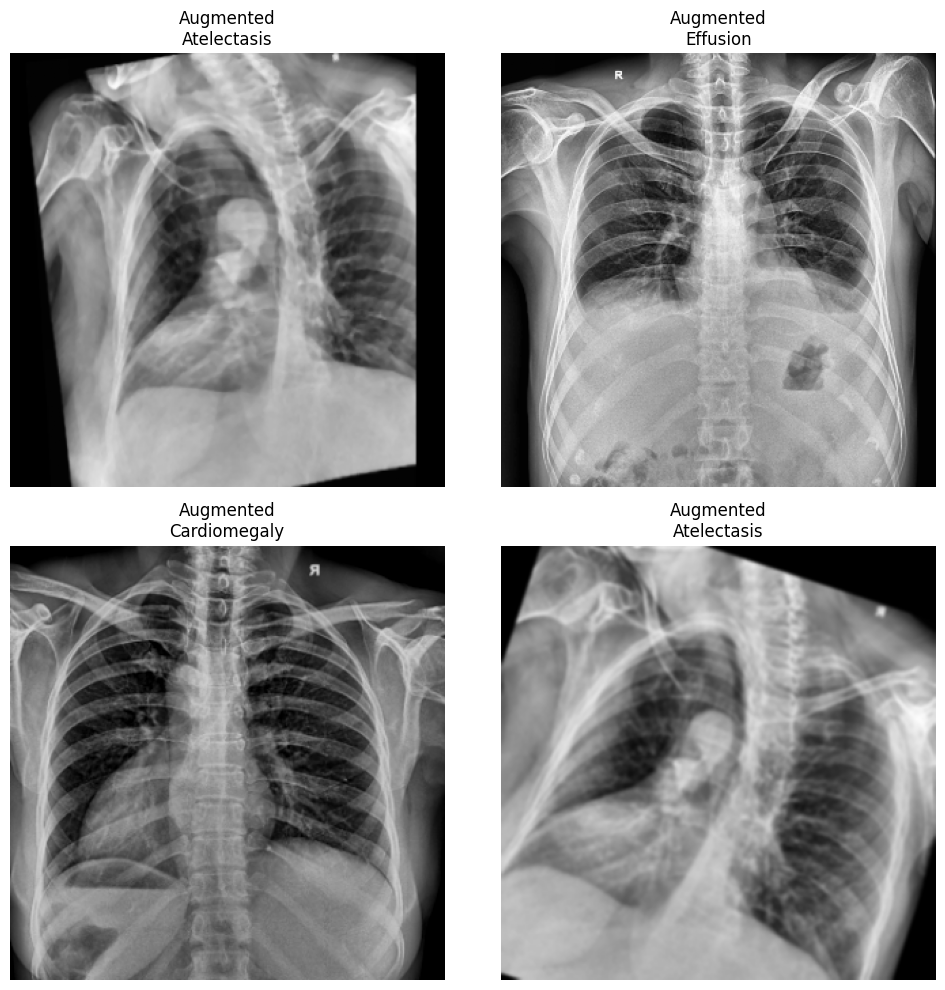

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer # If you were to use it explicitly
from tensorflow.keras.utils import Sequence # For MultiLabelAugDataGenerator
import albumentations as A # For augmentations
import cv2 # For augmentations
import os # For path joining

print("\n--- Calculating Class Weights (from current train_df for model.fit) ---")
class_weights_dict = {i: 1.0 for i in range(len(CLASS_NAMES))} # Default

if not train_df.empty and all(label in train_df.columns for label in CLASS_NAMES):
    class_totals_in_train = train_df[CLASS_NAMES].sum(axis=0).values

    if np.sum(class_totals_in_train) > 0 and len(class_totals_in_train) == len(CLASS_NAMES):
        total_positive_instances = np.sum(class_totals_in_train)
        if total_positive_instances > 0:
            class_weights_dict = {
                i: total_positive_instances / (len(CLASS_NAMES) * (count + K.epsilon()))
                for i, count in enumerate(class_totals_in_train)
            }
        else:
            print("No positive instances found in train_df to calculate balanced weights.")

    print("Calculated Class Weights (for model.fit):", class_weights_dict)
else:
    print("train_df is empty or missing label columns. Using default class weights for model.fit.")


# --- Define minority trigger labels for augmentation ---
# Adjust this list based on your dataset analysis (e.g., Atelectasis, Bronchitis)
minority_trigger_labels_list = ['Atelectasis', 'Bronchitis']
print(f"Minority trigger labels for advanced augmentation: {minority_trigger_labels_list}")


print("\n--- Creating Data Generators with Advanced Augmentations ---")

train_gen = None # Initialize, will be used in model training
if not train_df.empty:
    train_gen = MultiLabelAugDataGenerator(
        dataframe=train_df,
        image_dir=IMAGE_DIR_PATH,
        filename_col=FILENAME_COLUMN_IN_EXCEL,
        label_cols=CLASS_NAMES,
        batch_size=8,
        target_dim=(AUG_TARGET_HEIGHT, AUG_TARGET_WIDTH),
        shuffle=True,
        minority_augmenter=minority_advanced_aug,
        standard_augmenter=standard_aug,
        minority_trigger_labels=minority_trigger_labels_list
    )
    if train_gen: print(f"Train generator ('train_gen') created: {len(train_gen)} batches.")
else:
    print("train_df is empty. Cannot create train_gen.")

val_gen = None # Initialize, will be used in model training
if not valid_df.empty: # <--- CORRECTED: val_df to valid_df
    val_gen = MultiLabelAugDataGenerator( # <--- CORRECTED: val_df to valid_df
        dataframe=valid_df,      # <--- CORRECTED: val_df to valid_df
        image_dir=IMAGE_DIR_PATH,
        filename_col=FILENAME_COLUMN_IN_EXCEL,
        label_cols=CLASS_NAMES,
        batch_size=8,
        target_dim=(AUG_TARGET_HEIGHT, AUG_TARGET_WIDTH),
        shuffle=False,
        minority_augmenter=None,
        standard_augmenter=A.Compose([
            A.Resize(height=AUG_TARGET_HEIGHT, width=AUG_TARGET_WIDTH, interpolation=cv2.INTER_LINEAR, always_apply=True)
        ]),
        minority_trigger_labels=[]
    )
    if val_gen: print(f"Validation generator ('val_gen') created: {len(val_gen)} batches.")
else:
    print("valid_df is empty. Cannot create val_gen.") # <--- CORRECTED: val_df to valid_df

# --- (Optional) Visualize some augmented images from the TRAIN generator ---
if train_gen and len(train_gen) > 0:
    print("\n--- Visualizing Augmented Images from Training Generator ---")
    X_sample_batch, y_sample_batch = train_gen[0]
    num_images_to_show = min(4, X_sample_batch.shape[0])
    if num_images_to_show > 0:
        plt.figure(figsize=(10, 10))
        for i in range(num_images_to_show):
            img_to_display = X_sample_batch[i]
            labels_for_this_image = [CLASS_NAMES[j] for j, present in enumerate(y_sample_batch[i]) if present == 1]
            plt.subplot(2, 2, i + 1)
            plt.imshow(img_to_display)
            plt.title(f"Augmented\n{', '.join(labels_for_this_image) if labels_for_this_image else 'Normal'}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("Train generator created but is empty, cannot visualize batch.")
else:
    print("Cannot visualize augmented images: train_gen is not available or empty.")


--- Visualizing Augmented Images for Minority Classes ---


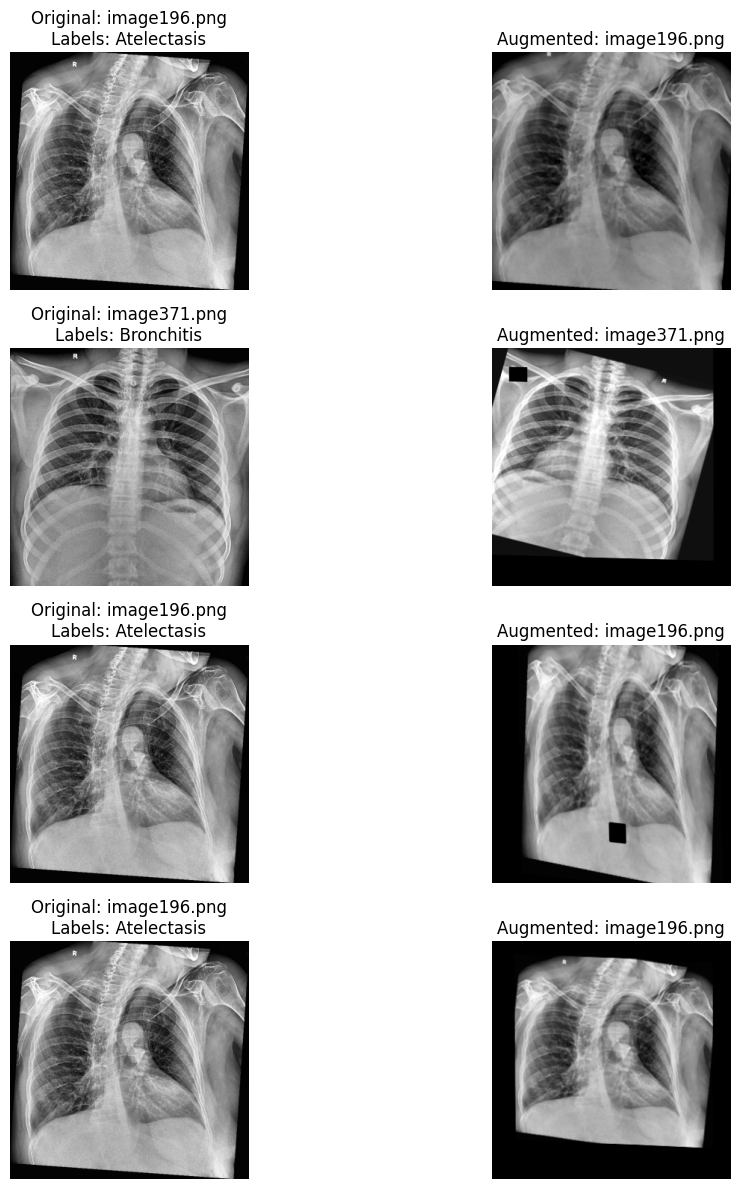

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print("\n--- Visualizing Augmented Images for Minority Classes ---")

minority_trigger_labels_list = ['Atelectasis', 'Bronchitis']

minority_condition = pd.Series([False] * len(train_df)) # Start with all false
for label in minority_trigger_labels_list:
    if label in train_df.columns:
        minority_condition = minority_condition | (train_df[label] == 1)

sample_df_minority = train_df[minority_condition]

if sample_df_minority.empty:
    print(f"No samples found in train_df with the specified minority labels: {minority_trigger_labels_list}")
else:
    num_images_to_visualize = min(4, len(sample_df_minority)) # Show up to 4 examples
    if num_images_to_visualize == 0:
        print("Not enough minority samples to visualize.")
    else:
        sampled_minority_rows = sample_df_minority.sample(num_images_to_visualize, random_state=42)

        plt.figure(figsize=(12, 12)) # Adjust size as needed

        for i, (index, row) in enumerate(sampled_minority_rows.iterrows()):
            img_filename = row[FILENAME_COLUMN_IN_EXCEL]
            img_path = os.path.join(IMAGE_DIR_PATH, img_filename)

            try:

                original_img_bgr = cv2.imread(img_path)
                if original_img_bgr is None:
                    print(f"Could not read image: {img_path}. Skipping.")
                    continue

                original_img_rgb = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2RGB)

            except Exception as e_load:
                print(f"Error loading image {img_path} for visualization: {e_load}")
                continue
            augmented_data = minority_advanced_aug(image=original_img_rgb.astype(np.uint8))
            augmented_image_rgb = augmented_data['image'] # This will also be uint8, RGB
            augmented_image_display = augmented_image_rgb

            plt.subplot(num_images_to_visualize, 2, 2*i + 1) # (rows, cols, index)
            plt.imshow(original_img_rgb) # Display the RGB version
            true_labels_for_this_image = [lbl for lbl in CLASS_NAMES if lbl in row and row[lbl] == 1]
            plt.title(f"Original: {img_filename}\nLabels: {', '.join(true_labels_for_this_image) if true_labels_for_this_image else 'Normal'}")
            plt.axis('off')

            # Augmented
            plt.subplot(num_images_to_visualize, 2, 2*i + 2)
            plt.imshow(augmented_image_display) # Display the RGB augmented version
            plt.title(f"Augmented: {img_filename}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

In [ ]:
# 8. Model (unchanged)
input_shape = (320, 320, 3)
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=input_shape)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
output = Dense(len(CLASS_NAMES), activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

def f1_loss(y_true, y_pred):
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    tp = K.sum(y_true * y_pred, axis=0)
    fp = K.sum((1 - y_true) * y_pred, axis=0)
    fn = K.sum(y_true * (1 - y_pred), axis=0)
    f1 = 2 * tp / (2 * tp + fp + fn + K.epsilon())
    return 1 - K.mean(f1)

def hybrid_loss(y_true, y_pred):
    ce = K.mean(K.binary_crossentropy(y_true, y_pred))
    f1 = f1_loss(y_true, y_pred)
    return ce + f1

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=hybrid_loss,
    metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall')]
)

callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True, monitor='val_auc', mode='max'),
    ReduceLROnPlateau(patience=4, factor=0.2, verbose=1, monitor='val_auc', mode='max'),
    ModelCheckpoint('best_model_finetuned.keras', save_best_only=True, monitor='val_auc', mode='max')
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=35,
    callbacks=callbacks
)

# Fine-tuning
for layer in base_model.layers[-35:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=hybrid_loss,
    metrics=[AUC(name='auc'), Precision(name='precision'), Recall(name='recall')]
)

history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=35,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - auc: 0.5181 - loss: 1.8384 - precision: 0.2066 - recall: 0.1937

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - auc: 0.5184 - loss: 1.8377 - precision: 0.2068 - recall: 0.1935 - val_auc: 0.5653 - val_loss: 1.6726 - val_precision: 1.0000 - val_recall: 0.0154 - learning_rate: 1.0000e-04
Epoch 2/35
128/128 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - auc: 0.6117 - loss: 1.6131 - precision: 0.2945 - recall: 0.1960 - val_auc: 0.6214 - val_loss: 1.5963 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/35
128/128 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - auc: 0.6995 - loss: 1.4687 - precision: 0.4086 - recall: 0.2879 - val_auc: 0.6373 - val_loss: 1.5452 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/35
128/128 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - auc: 0.7332 - loss: 1.4025 - precision: 0.4421 - recall: 0.3438 - val_auc: 0.6463 - val_loss: 1.5309 - val_precision: 0.7500 - val_recall: 0.0923 - learning_rate: 1.0000e-04
Epoch 5/35
128/128 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - auc: 0.7703 - loss: 1.33

In [ ]:
import importlib
import util # If already imported
importlib.reload(util)
print("Reloaded util module.")